In [1]:
import pandas as pd
from datetime import datetime
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import math
from math import sqrt

import statsmodels.api as sm

c:\Users\cleme\anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\cleme\anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\cleme\anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:379: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

c:\Users\cleme\anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:383: DeprecationWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

c:\Users\cleme\anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\tsa\

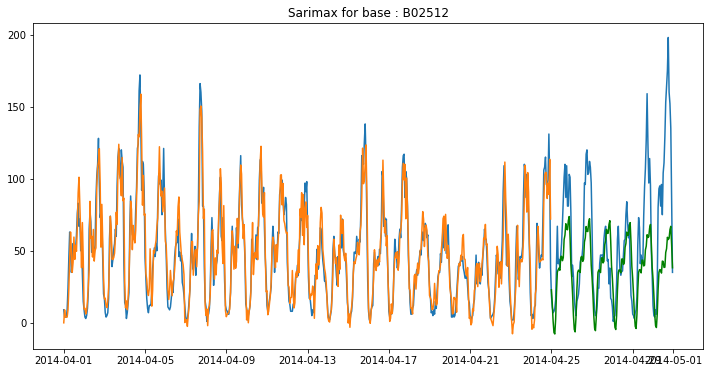

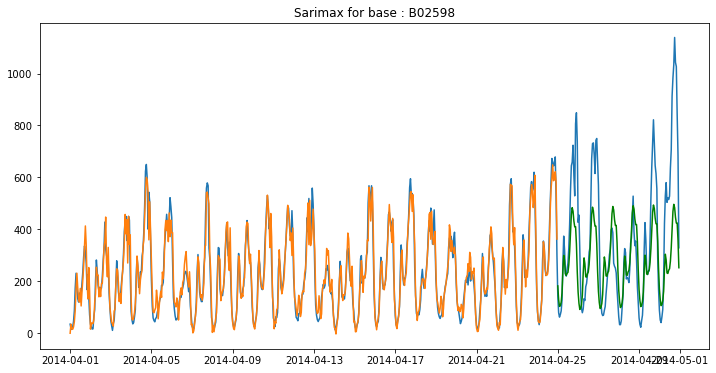

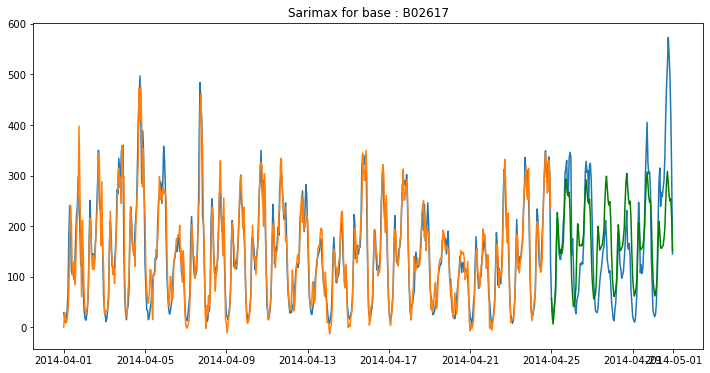

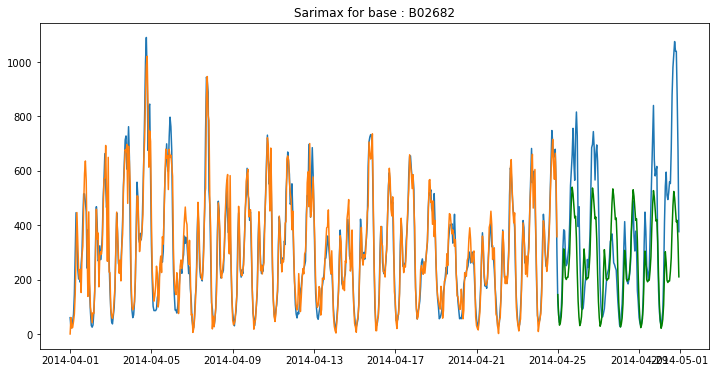

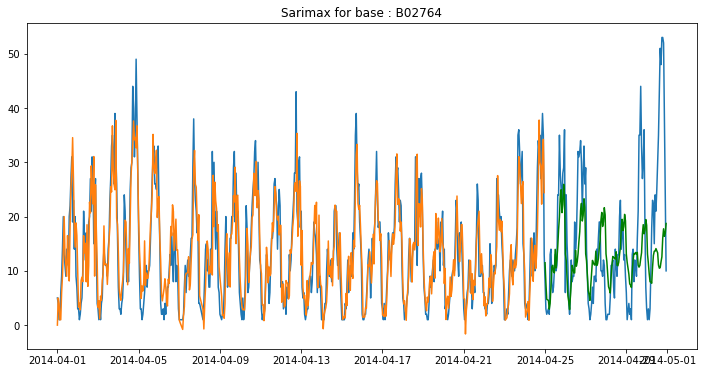

In [2]:
uber_apr14 = pd.read_csv('uber-tlc-foil-response-master/uber-trip-data/uber-raw-data-apr14.csv')

uber_apr14['Date/Time'] = pd.to_datetime(uber_apr14['Date/Time'])

df_by_base = uber_apr14.groupby([pd.Grouper(key='Date/Time',freq='H'),uber_apr14.Base]).size().reset_index(name='count')

def create_dataset(dataset, look_back=15):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

df_b02512 = df_by_base[df_by_base['Base']=='B02512'].drop(axis=0, columns='Base')
df_b02598 = df_by_base[df_by_base['Base']=='B02598'].drop(axis=0, columns='Base')
df_b02617 = df_by_base[df_by_base['Base']=='B02617'].drop(axis=0, columns='Base')
df_b02682 = df_by_base[df_by_base['Base']=='B02682'].drop(axis=0, columns='Base')
df_b02764 = df_by_base[df_by_base['Base']=='B02764'].drop(axis=0, columns='Base')

for df, base in zip([df_b02512, df_b02598, df_b02617, df_b02682, df_b02764],['B02512', 'B02598', 'B02617', 'B02682', 'B02764']):
    
    df_for_graph = df.reset_index(drop=True)

    train_size = int(len(df_for_graph) * 0.8)
    test_size = len(df_for_graph) - train_size
    train, test = df_for_graph[0:train_size], df_for_graph[train_size:len(df)]

    train.index = pd.to_datetime(train['Date/Time'])
    test.index = pd.to_datetime(test['Date/Time'])

    model=sm.tsa.statespace.SARIMAX(train['count'],order=(2, 1, 2),seasonal_order=(2,1,2,12))
    #model._index = pd.to_datetime(train['Date/Time'])
    model=model.fit()

    fig, ax = plt.subplots(figsize=(12, 6))

    pred = model.predict()
    pred_test = model.forecast(test_size)

    ax.plot(df_for_graph['Date/Time'], df_for_graph['count'])
    ax.plot(train['Date/Time'], pred)

    ax.plot(test['Date/Time'], pred_test, color='green')

    plt.title("Sarimax for base : " + base )    